In [2]:
import pandas as pd

In [3]:
tokens_df = pd.read_csv("results/tokens.tsv", names=["study", "notation", "slug", "token"], delimiter="\t")

In [4]:
df = tokens_df.query("study == 'movies'").groupby(["token", "notation"])["slug"].nunique().reset_index()

In [5]:
import plotly.express as px

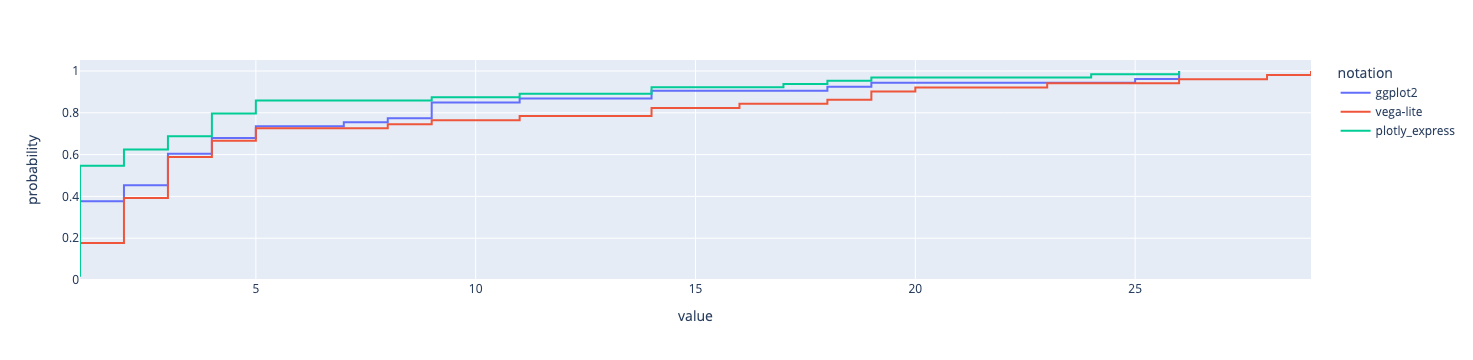

In [7]:
px.ecdf(df.query("slug<30"), color="notation", hover_name="token")


In [50]:
import math

In [73]:
for notation, subdf in df.groupby("notation"):
    entropy = 0
    for _, r in subdf.iterrows():
        frac = r.slug/subdf.slug.max()
        entropy -= frac * math.log2(frac)
    print(notation, round(entropy, 2))

ggplot2 15.89
plotly_express 16.63
vega-lite 15.85
